**PACKAGES**

In [ ]:
%tensorflow_version 2.x
import scipy as sp
from scipy import stats
import tensorflow as tf
import numpy as np
from numpy.random import seed
tf.random.set_seed(42)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.tree import DecisionTreeClassifier
from keras import losses
from keras.models import Sequential
from keras.layers import Dense
#from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, CSVLogger, ModelCheckpoint
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import Normalizer

import datetime, os
import time
import heapq
from google.colab import drive
seed_value= 42
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
import numpy as np
np.random.seed(seed_value)
import tensorflow as tf
tf.random.set_seed(seed_value)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
drive.mount('/content/drive')
!pip install xgboost

import sklearn.linear_model
import numpy as np
from sklearn.model_selection import KFold
import sklearn.metrics
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.base import clone

from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_class_weight
from sklearn import neural_network
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.base import clone
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy.stats import iqr
import itertools

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 **FUNCTIONS**

**Data manipulation:** Function for test set stratification

In [ ]:
def data_manipulation(X_train,X_test,y_train,y_test):
  i_1_test=np.where(y_test==1)[0].shape
  i_0_test=np.where(y_test==0)[0].shape
  l=len(y_test)
  if i_1_test[0]<(l/2):
    #print("in")
    test_mutant=np.where(y_test==1)
    train_mutant=np.where(y_train==1)
    index_to_add=int((l/2)-(i_1_test[0]))
    I=train_mutant[0]
    #print(index_to_add)
    zero_test=np.where(y_test==0)[0]
    #print(zero_test)
    indexes_train_to_change=[]
    indexes_test_to_change=[]
    for m in range(index_to_add):
      indexes_train_to_change.append(I[m])
      indexes_test_to_change.append(zero_test[m])
      #print(indexes_train_to_change,indexes_test_to_change)

    X_train_new,X_test_new,y_train_new,y_test_new=X_train,X_test,y_train,y_test
    for i in range(index_to_add):
      #print("in")
      y_test_new[indexes_test_to_change[i]]=y_train[indexes_train_to_change[i]]
      y_train_new[indexes_train_to_change[i]]=y_test[indexes_test_to_change[i]]
      X_test_new[indexes_test_to_change[i]]=X_train[indexes_train_to_change[i]]
      X_train_new[indexes_train_to_change[i]]=X_test[indexes_test_to_change[i]]

      X_train,X_test,y_train,y_test=X_train_new,X_test_new,y_train_new,y_test_new
  return X_train,X_test,y_train,y_test

In [ ]:
def cross_val_scores_personal(model, X, y, weights, rand_state_arr, cv=10, metrics=[sklearn.metrics.accuracy_score]):
    scores = []
    Y_TEST = []
    Y_PROBA = []
    for l in rand_state_arr:
      kf = StratifiedKFold(n_splits=cv, random_state=l)
      kf.get_n_splits(X, y)
      for train_index, test_index in kf.split(X, y):
        model_clone = sklearn.base.clone(model)
        X_TRAIN, X_test = X[train_index], X[test_index]
        y_TRAIN, y_test = y[train_index], y[test_index]
        X_train, y_train = oversampled.fit_sample(X_TRAIN, y_TRAIN)
        X_train,X_test,y_train,y_test=data_manipulation(X_train,X_test,y_train,y_test)
        model_clone.fit(X_train,y_train)
        y_pred = model_clone.predict(X_test)
        y_pred_proba = model_clone.predict_proba(X_test)
        for i, metric in enumerate(metrics):
            score = metric(y_test, y_pred)
            scores.append(score)
            Y_TEST.append(y_test) 
            Y_PROBA.append(y_pred)
          
    return scores, Y_TEST, Y_PROBA




def mygridsearch(tuned_parameters,clf3, features, labels, rand_state_arr):
  Values_of_params=list(tuned_parameters.values())
  Names_of_params=list(tuned_parameters.keys())
  xx=np.array(Names_of_params)
  myProduct = list(itertools.product(*Values_of_params))
  splitted=10
  cv = StratifiedKFold(n_splits=splitted)
  all_scores_acc = np.zeros((len(myProduct), (len(rand_state_arr))*(cv.n_splits)))
  all_scores_roc = np.zeros((len(myProduct), (len(rand_state_arr))*(cv.n_splits)))
  stat_value = np.zeros(len(myProduct)) 

  best_mean=0
  best_std=1
  weights = None
  best_dict_of_param={}    
  diction_of_param={}
  count = 0   
    
  for value in itertools.product(*Values_of_params):
    for j in range(0,xx.shape[0]):
      vbv1={Names_of_params[j]:value[j]}  
      diction_of_param.update(vbv1)
    clf3.set_params(**diction_of_param)
    scores, Y_TEST, Y_PROBA = cross_val_scores_personal(clf3, features, labels, weights, rand_state_arr, cv=splitted, metrics=[sklearn.metrics.accuracy_score])
    stat_value[count]=np.mean(np.array(scores))
    all_scores_acc[count] = scores

        #######################MARLU############################
    mean = np.mean(all_scores_acc[count])
    std = np.std(all_scores_acc[count])
    q1 = np.percentile(all_scores_acc[count], 25)
    q3 = np.percentile(all_scores_acc[count], 75)
    median = np.percentile(all_scores_acc[count], 50)
    interq = q3-q1
    low = np.min(all_scores_acc[count])
    high = np.max(all_scores_acc[count])
    lim_low = q1 - 1.5*interq
    SORT = np.sort(all_scores_acc[count])

    if mean > best_mean and np.abs(mean - best_mean) > 0.005:
      best_mean = mean
      best_std = std
      best_dict_of_param = diction_of_param
      if np.where(SORT>lim_low)[0]!=[]:
        #print ("np.where(SORT>lim_low) pass")
        index0 = np.where(SORT > lim_low)
        R0 = (median - np.min(SORT[index0]))
      elif np.where(SORT>=lim_low)[0]!=[]:
        index0=np.where(SORT>=lim_low)
        R0 = (median - np.min(SORT[index0]))
        #print(R0)
                
    elif mean > best_mean and np.abs(mean - best_mean) < 0.005:
      if np.where(SORT>lim_low)[0]!=[]:
        #print ("np.where(SORT>lim_low) pass")
        index1 = np.where(SORT > lim_low)
        R1 = (median - np.min(SORT[index1]))
      elif np.where(SORT>=lim_low)[0]!=[]:
        index1=np.where(SORT>=lim_low)
        R1 = (median - np.min(SORT[index1]))
        #print(R0)
      if R1 < R0:
        best_mean = mean
        best_std = std
        best_dict_of_param = diction_of_param
               
    elif mean < best_mean and np.abs(mean - best_mean) < 0.005:
      if np.where(SORT>lim_low)[0]!=[]:
        #print ("np.where(SORT>lim_low) pass")
        index1 = np.where(SORT > lim_low)
        R1 = (median - np.min(SORT[index1]))
      elif np.where(SORT>=lim_low)[0]!=[]:
        index1=np.where(SORT>=lim_low)
        R1 = (median - np.min(SORT[index1]))
        #print(R0)
      if R1 < R0:
        best_mean = mean
        best_std = std
        best_dict_of_param = diction_of_param

    count +=1
  print(best_dict_of_param)
  print()
  print("%0.3f (+/-%0.03f)" % (best_mean,best_std ))
  return best_dict_of_param, best_mean, best_std

In [ ]:
#Seq="T2"

ROI="T1"

#NECROSI
#NET
#T1

Pred="KI67"

#MGMT
#EGFR
#KI67
#IDH

GBx
{'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 800, 'learning_rate': 1}

0.833 (+/-0.089)
GB
{'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 800, 'learning_rate': 1}

0.850 (+/-0.095)
RF
{'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 800}

0.892 (+/-0.073)
LR
{'max_iter': 100, 'solver': 'lbfgs'}

0.653 (+/-0.131)
ST
{'final_estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), 'estimators': [('rf', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decreas

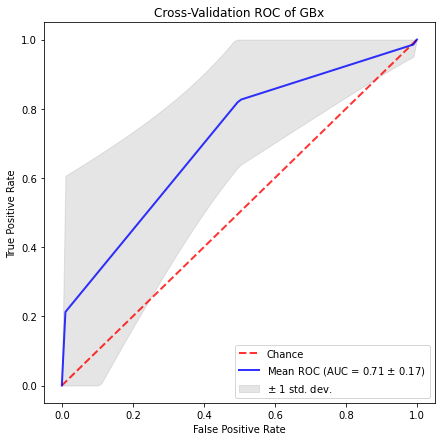

GB
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=15,
                           min_weight_fraction_leaf=0.0, n_estimators=800,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


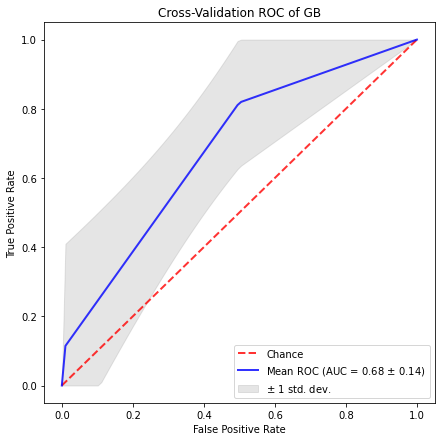

RF
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


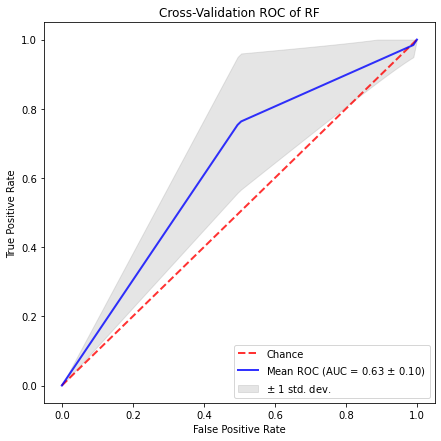

LR
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


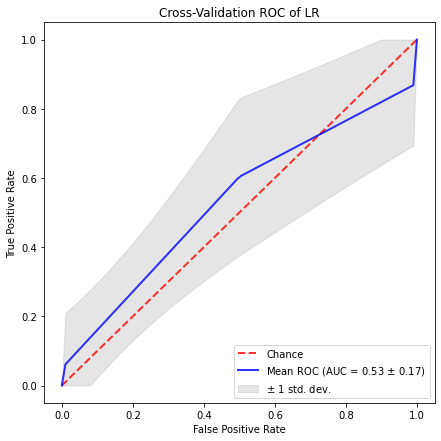

ST
StackingClassifier(cv=None,
                   estimators=[('GB',
                                GradientBoostingClassifier(ccp_alpha=0.0,
                                                           criterion='friedman_mse',
                                                           init=None,
                                                           learning_rate=1.0,
                                                           loss='deviance',
                                                           max_depth=1,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_sample

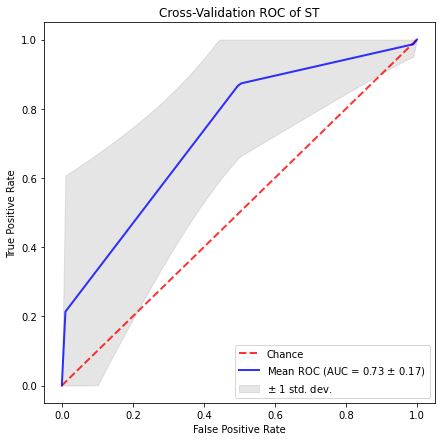

KN
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


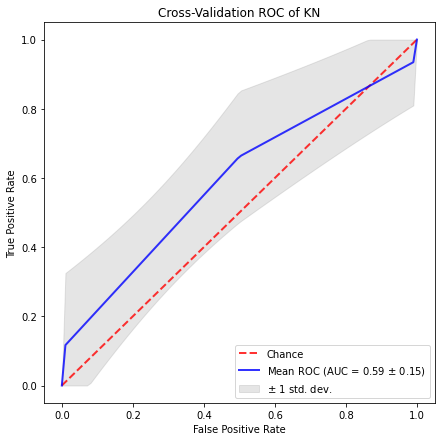

DT
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


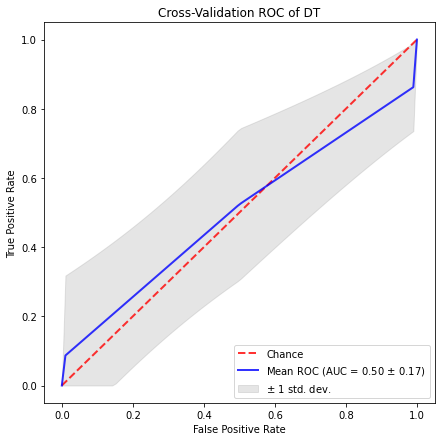

AB
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=500, random_state=None)


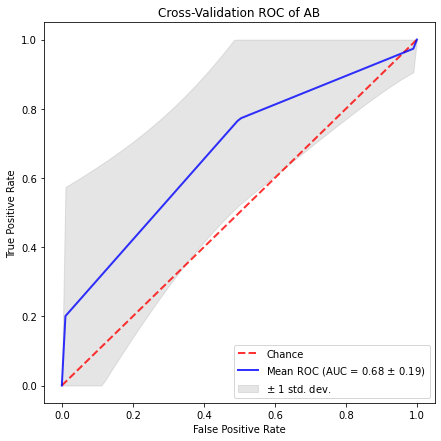

ST_ABC
StackingClassifier(cv=None,
                   estimators=[('GB',
                                GradientBoostingClassifier(ccp_alpha=0.0,
                                                           criterion='friedman_mse',
                                                           init=None,
                                                           learning_rate=1,
                                                           loss='deviance',
                                                           max_depth=3,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=5,
                                                           min_samp

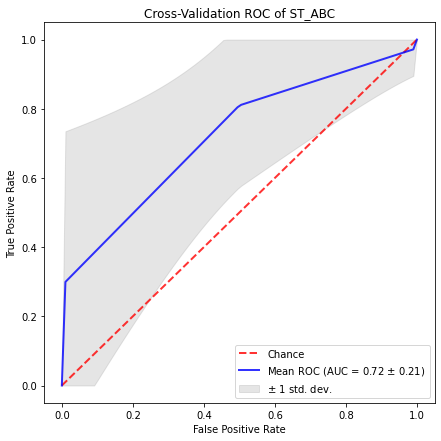

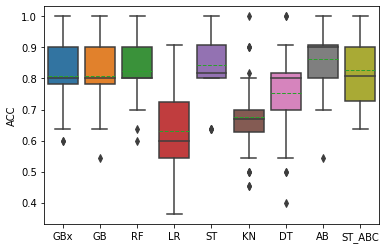

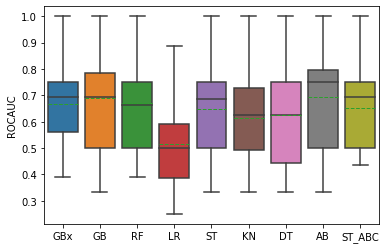

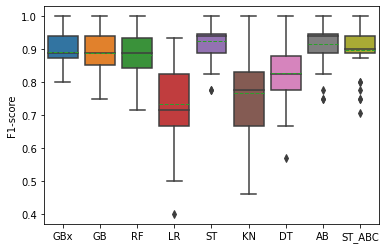

In [ ]:
SEQ = ['ADC']

for seq in SEQ:
  data= pd.read_excel(f'/content/drive/My Drive/CSV_DATA/CSV_DATA/{ROI}_ROI/boruta_{seq}_{ROI}_{Pred}_sorted.xlsx' )
  y = data.KI67
  x = data.iloc[:,2:len(data.columns)] #da mettere 3 per ETA
  dataf = y.to_frame().join(x)
  df = pd.DataFrame(dataf) 
  target=df.iloc[:,0] 
  df_reduced = pd.concat([target, x], axis=1) 

  y = df_reduced.KI67
  FEATURES  =x.values 
  N = FEATURES.shape[1]
  LABELS = y.values 
  indices = range(len(LABELS)) 

############################################################################################################################ 
  oversampled = SMOTE()
  #FEATURES, LABELS = oversampled.fit_sample(features, labels)
  rand_state_arr = [23,35, 56, 90]

  clfx = xgb.XGBClassifier()
  tuned_parameters_clfx = {'min_samples_leaf': [1, 3, 5], 'min_samples_split': [2, 8, 15], 'n_estimators': [100, 200, 300, 500, 600, 800], 'learning_rate': [1]}

  clf3 = GradientBoostingClassifier()
  tuned_parameters_clf3 = {'min_samples_leaf': [1, 3, 5], 'min_samples_split': [2, 8, 15], 'n_estimators': [100, 200, 300, 500, 600, 800], 'learning_rate': [1]}

  clfrf = RandomForestClassifier(class_weight='balanced')
  tuned_parameters_clfrf = {'min_samples_leaf': [1, 3, 5], 'min_samples_split': [2, 8, 15], 'n_estimators': [100, 200, 300, 500, 600, 800]}
  
  clfLR = LogisticRegression()
  tuned_parameters_clfLR = {'max_iter': [100], 'solver': ['sag', 'saga', 'lbfgs']}

  estimators1 = [('GB', GradientBoostingClassifier(n_estimators=200, learning_rate=1.0, max_depth=1)), ('rf', RandomForestClassifier(n_estimators=500))]
  estimators2 = [ ('rf', RandomForestClassifier(n_estimators=500)), ('GB', GradientBoostingClassifier(n_estimators=200, learning_rate=1.0, max_depth=1))]
  clfSTCl2 = StackingClassifier(estimators=estimators1)
  tuned_parameters_clfSTCl2 = {'final_estimator': [LogisticRegression()], 'estimators': [estimators1,estimators2]}

  clfKNeibor=KNeighborsClassifier()
  tuned_parameters_clfKNeibor = {'n_neighbors': [3, 5], 'leaf_size': [30, 50, 80]}

  clfDT= DecisionTreeClassifier()
  tuned_parameters_clfDT = {'max_depth': [1, 5, 10]}

  clfABC= AdaBoostClassifier()
  tuned_parameters_clfABC = {'n_estimators': [50, 200, 500]}

  clfSTClABC = []
  tuned_parameters_clfSTClABC={}

  #clf_names = [  'AB']
  #clfs = [clfABC]
  #tuned_parameters_= [tuned_parameters_clfABC]
  #all_best_dict_param=[]

  clf_names = ['GBx', 'GB', 'RF', 'LR', 'ST', 'KN', 'DT', 'AB','ST_ABC']
  clfs = [clfx, clf3, clfrf, clfLR, clfSTCl2, clfKNeibor, clfDT, clfABC,clfSTClABC]
  tuned_parameters_= [tuned_parameters_clfx, tuned_parameters_clf3, tuned_parameters_clfrf, tuned_parameters_clfLR, tuned_parameters_clfSTCl2, tuned_parameters_clfKNeibor, tuned_parameters_clfDT, tuned_parameters_clfABC,tuned_parameters_clfABC ]
  all_best_dict_param=[]

  for i in range(len(clfs)):
      clf = clone(clfs[i])
      print(clf_names[i])
      if clf_names[i]=='GB':
        best_dict_of_param, best_value, best_std = mygridsearch(tuned_parameters_[i],clf, FEATURES, LABELS, rand_state_arr)
        all_best_dict_param.append(best_dict_of_param)
        GB_best_dict=best_dict_of_param
      elif clf_names[i]=='RF': 
        best_dict_of_param, best_value, best_std = mygridsearch(tuned_parameters_[i],clf, FEATURES, LABELS, rand_state_arr)
        all_best_dict_param.append(best_dict_of_param)
        RF_best_dict=best_dict_of_param
      elif clf_names[i]=='ST':
        clf3.set_params(**GB_best_dict)
        clfrf.set_params(**RF_best_dict)
        estimators1 = [('GB', clf3), ('rf', clfrf)]
        estimators2 = [('rf', clfrf), ('GB', clf3)]
        clfSTCl2 = StackingClassifier(estimators=estimators1)
        clf = clone(clfSTCl2)       
        best_dict_of_param, best_value, best_std = mygridsearch(tuned_parameters_[i],clf, FEATURES, LABELS, rand_state_arr)
        all_best_dict_param.append(best_dict_of_param)
      elif clf_names[i]=='AB': 
        best_dict_of_param, best_value, best_std = mygridsearch(tuned_parameters_[i],clf, FEATURES, LABELS, rand_state_arr)
        all_best_dict_param.append(best_dict_of_param)
        ABC_best_dict=best_dict_of_param
      elif clf_names[i]=='ST_ABC':
        print('entro')
        clf3.set_params(**GB_best_dict)
        clfrf.set_params(**RF_best_dict) 
        clfABC.set_params(**ABC_best_dict)
        estimators1 = [('GB', clf3), ('rf', clfrf)]
        estimators2 = [('rf', clfrf), ('GB', clf3)]
        clfSTClABC = StackingClassifier(estimators=estimators1)
        clfs[i]=clfSTClABC
        clf = clone(clfs[i])       
        tuned_parameters_[i]= {'final_estimator': [LogisticRegression(), clfABC],'estimators': [estimators1,estimators2]}
        best_dict_of_param, best_value, best_std = mygridsearch(tuned_parameters_[i],clf, FEATURES, LABELS, rand_state_arr)
        all_best_dict_param.append(best_dict_of_param)  
      else:
        best_dict_of_param, best_value, best_std = mygridsearch(tuned_parameters_[i],clf, FEATURES, LABELS, rand_state_arr)
        all_best_dict_param.append(best_dict_of_param) 


############################################################################################################################  
  N = ['70']
  FEATURES40 = FEATURES[:, 0:40]
  FEATURES20 = FEATURES[:,0:20]
  F = [FEATURES]
  for number in range(len(F)):
    class_weights = compute_class_weight('balanced',np.unique(LABELS), LABELS)
    # weights = np.zeros(len(labels))
    # weights[labels == 0] = class_weights[1]
    # weights[labels == 1] = class_weights[0]
    weights = None
    splitted=10
    cv = StratifiedKFold(n_splits=splitted)
    all_scores_acc = np.zeros((len(clf_names), (len(rand_state_arr))*(cv.n_splits)))
    all_scores_roc = np.zeros((len(clf_names), (len(rand_state_arr))*(cv.n_splits)))
    all_scores_f1 = np.zeros((len(clf_names), (len(rand_state_arr))*(cv.n_splits)))

    for i in range(len(clfs)):
        clf = clone(clfs[i])
        print(clf_names[i])
        print(clf)
        clf.set_params(**all_best_dict_param[i])
        scores_acc, Y_TEST, Y_PROBA = cross_val_scores_personal(clf, F[number], LABELS, weights, rand_state_arr, cv=splitted, metrics=[sklearn.metrics.accuracy_score])
        scores_roc, Y_TEST, Y_PROBA = cross_val_scores_personal(clf, F[number], LABELS, weights, rand_state_arr, cv=splitted, metrics=[sklearn.metrics.roc_auc_score])
        scores_f1, Y_TEST, Y_PROBA = cross_val_scores_personal(clf, F[number], LABELS, weights, rand_state_arr, cv=splitted, metrics=[sklearn.metrics.f1_score])
        all_scores_acc[i] = scores_acc
        all_scores_roc[i] = scores_roc
        all_scores_f1[i] = scores_f1
        ##################################################################################################
        tprs = [] 
        aucs = [] 
        mean_fpr = np.linspace(0, 1, 100) 
        plt.figure(figsize=(7,7)) 
        k = 0 
        for j in range(splitted):
          # Compute ROC curve and area the curve
          fpr, tpr, thresholds = roc_curve(Y_TEST[j], Y_PROBA[j])
          tprs.append(np.interp(mean_fpr, fpr, tpr))
          tprs[-1][0] = 0.0
          roc_auc = auc(fpr, tpr)
          aucs.append(roc_auc)
          # plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (k, roc_auc))
          k += 1 
      
        plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        std_auc = np.std(aucs)
        std_tpr = np.std(tprs, axis=0)
        tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
        tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
        plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')
        plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Cross-Validation ROC of %s' % clf_names[i])
        plt.legend(loc="lower right", prop={'size': 10})
        plt.savefig(f'/content/drive/My Drive/CSV_DATA/NEW_FIGURES/ROI_{ROI}/{seq}_{Pred}_cross_validation_ROC_scale_{N[number]}_feature_{clf_names[i]}_SMOTE_2508.png')
        plt.show() 

    ###################################### 
    fig, ax = plt.subplots()
    sns.boxplot(data=pd.DataFrame(all_scores_acc.T, columns=clf_names),showmeans=True, meanline=True, ax=ax)
    ax.set_ylabel('ACC')
    fig.savefig(f'/content/drive/My Drive/CSV_DATA/NEW_FIGURES/ROI_{ROI}/{seq}_{Pred}_classificators_accuracy_scale_{N[number]}_feature_SMOTE_2508.png')
    ###################################### 
    fig, ax = plt.subplots()
    sns.boxplot(data=pd.DataFrame(all_scores_roc.T, columns=clf_names),showmeans=True, meanline=True, ax=ax)
    ax.set_ylabel('ROCAUC')
    fig.savefig(f'/content/drive/My Drive/CSV_DATA/NEW_FIGURES/ROI_{ROI}/{seq}_{Pred}_classificators_roc_scale_{N[number]}_feature_SMOTE_2508.png')
    ######################################
    fig, ax = plt.subplots()
    sns.boxplot(data=pd.DataFrame(all_scores_f1.T, columns=clf_names),showmeans=True, meanline=True, ax=ax)
    ax.set_ylabel('F1-score')
    fig.savefig(f'/content/drive/My Drive/CSV_DATA/NEW_FIGURES/ROI_{ROI}/{seq}_{Pred}_classificators_f1_scale_{N[number]}_feature_SMOTE_2508.png')
    ######################################
    best = pd.DataFrame(all_best_dict_param)
    classificator = pd.DataFrame(clf_names, columns=['CLASSIFICATOR'])
    BEST = pd.concat([classificator, best], axis=1) 
    BEST.to_excel(f'/content/drive/My Drive/CSV_DATA/NEW_FIGURES/ROI_{ROI}/OPTIMAL_DATA/{seq}_{Pred}_{N[number]}_features_best_classificator_parameter_SMOTE_2508.xlsx')

    ACC = pd.DataFrame(all_scores_acc)
    ACCURACY = pd.concat([classificator, ACC], axis=1)
    ACCURACY.to_excel(f'/content/drive/My Drive/CSV_DATA/NEW_FIGURES/ROI_{ROI}/OPTIMAL_DATA/{seq}_{Pred}_{N[number]}_features_accuracy_values_SMOTE_2508.xlsx')

    ROC = pd.DataFrame(all_scores_roc)
    ROCAUC = pd.concat([classificator, ROC], axis=1)
    ROCAUC.to_excel(f'/content/drive/My Drive/CSV_DATA/NEW_FIGURES/ROI_{ROI}/OPTIMAL_DATA/{seq}_{Pred}_{N[number]}_features_rocauc_values_SMOTE_2508.xlsx')

    F1 = pd.DataFrame(all_scores_f1)
    F1 = pd.concat([classificator, F1], axis=1)
    F1.to_excel(f'/content/drive/My Drive/CSV_DATA/NEW_FIGURES/ROI_{ROI}/OPTIMAL_DATA/{seq}_{Pred}_{N[number]}_features_F1_values_SMOTE_2508.xlsx')
